In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import preprocessing
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import load_model
import netron
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
Train_df = pd.read_csv("Train.csv")
Test_df = pd.read_csv("Test.csv")
Train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [3]:
import pandas as pd
import cv2

Train_labels1=Train_df["ClassId"].values
Test_labels1=Test_df["ClassId"].values
Train_images1=[]
Test_images1=[]
new_size = (30, 30)



for index, row in Train_df.iterrows():
    img_path = row["Path"]
    train_img = cv2.imread(img_path)
    train_img_rgb = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)
    resized_train_img_rgb = cv2.resize(train_img_rgb, new_size)/255
    Train_images1.append(resized_train_img_rgb)
for index, row in Test_df.iterrows():
    img_path = row["Path"]
    test_img = cv2.imread(img_path)
    test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    resized_test_img_rgb = cv2.resize(test_img_rgb, new_size)/255
    Test_images1.append(resized_test_img_rgb)
   

for img in Train_images1:
    print(img.shape)
    


(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30, 30, 3)
(30,

In [4]:
Train_labels1=np.array(Train_labels1)
Test_labels=np.array(Test_labels1)
Train_images1=np.array(Train_images1)
Test_images=np.array(Test_images1)

In [5]:
from sklearn.model_selection import train_test_split
Train_images, Valid_images, Train_labels, Valid_labels = train_test_split(Train_images1, Train_labels1, test_size=0.1)


In [6]:
from tensorflow import keras
Train_labels = keras.utils.to_categorical(Train_labels)
Test_labels = keras.utils.to_categorical(Test_labels)
Valid_labels = keras.utils.to_categorical(Valid_labels)

# شبکه MLP

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam
from tensorflow.keras.models import load_model
import netron

model = keras.Sequential([
    layers.Flatten(input_shape=(30, 30, 3)),  # لایهٔ ورودی
    layers.Dense(256, activation='relu'),   # لایهٔ پنهان 1
    layers.Dense(128, activation='relu'),    # لایهٔ پنهان 2
    layers.Dense(43, activation='softmax')  # لایهٔ خروجی
])

sgd = SGD(learning_rate=0.002)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(Train_images, Train_labels, epochs=20, validation_data=(Valid_images,Valid_labels))


test_loss, test_acc = model.evaluate(Test_images, Test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)



model.save('model.h5')

netron.start('model.h5')


Epoch 1/20
1103/1103 [==============================] - 9s 8ms/step - loss: 2.6986 - accuracy: 0.3562 - val_loss: 1.9376 - val_accuracy: 0.5427
Epoch 2/20
1103/1103 [==============================] - 6s 6ms/step - loss: 1.5638 - accuracy: 0.6116 - val_loss: 1.2293 - val_accuracy: 0.6950
Epoch 3/20
1103/1103 [==============================] - 7s 6ms/step - loss: 1.0563 - accuracy: 0.7341 - val_loss: 0.9037 - val_accuracy: 0.7669
Epoch 4/20
1103/1103 [==============================] - 7s 6ms/step - loss: 0.8010 - accuracy: 0.8009 - val_loss: 0.6974 - val_accuracy: 0.8286
Epoch 5/20
1103/1103 [==============================] - 6s 6ms/step - loss: 0.6595 - accuracy: 0.8371 - val_loss: 0.6005 - val_accuracy: 0.8508
Epoch 6/20
1103/1103 [==============================] - 5s 5ms/step - loss: 0.5532 - accuracy: 0.8643 - val_loss: 0.5421 - val_accuracy: 0.8572
Epoch 7/20
1103/1103 [==============================] - 6s 5ms/step - loss: 0.4868 - accuracy: 0.8821 - val_loss: 0.4754 - val_accuracy:

('localhost', 8080)

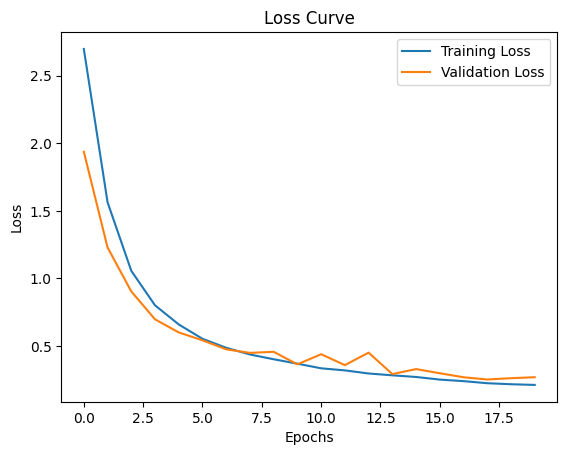

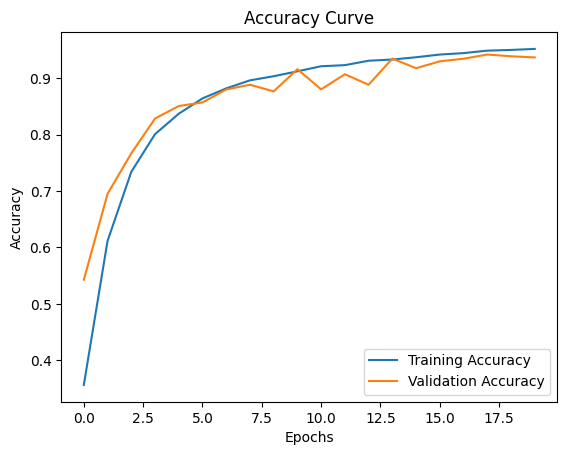

Test Loss: 0.7560645341873169
Test Accuracy: 0.8486143946647644
Validation Loss: 0.26879656314849854
Validation Accuracy: 0.937005877494812
395/395 [==============================] - 1s 4ms/step


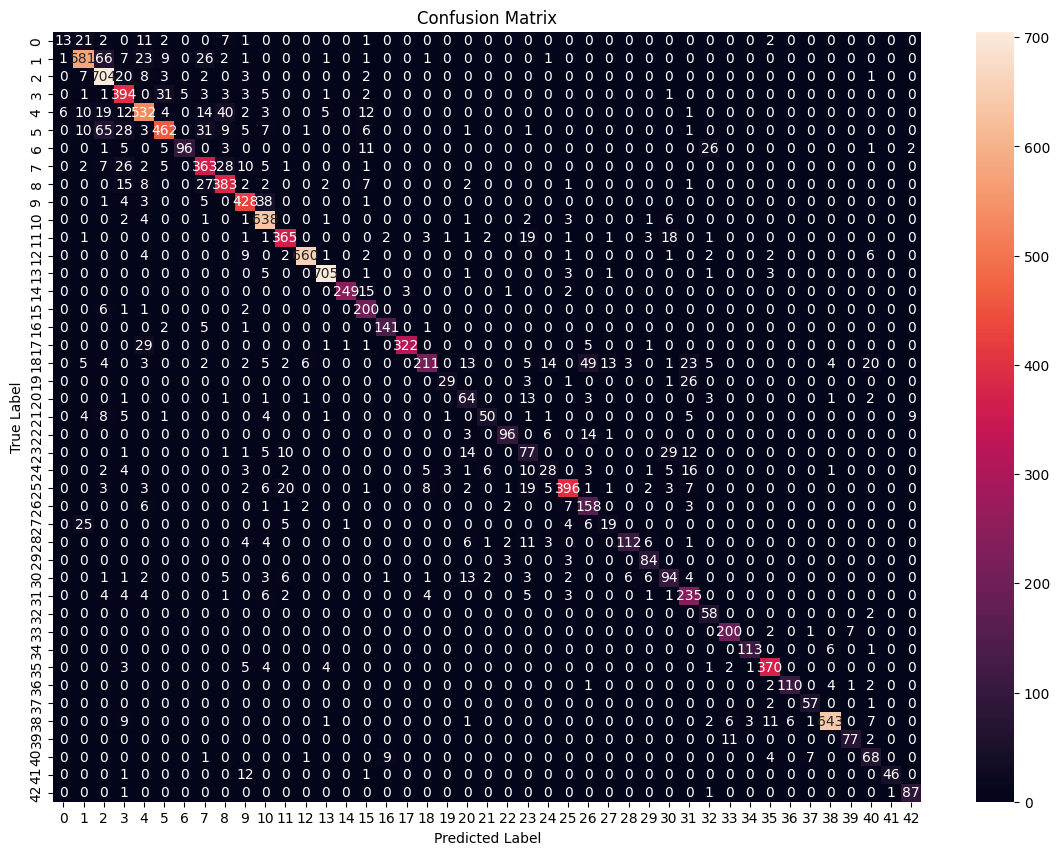

123/123 [==============================] - 0s 3ms/step


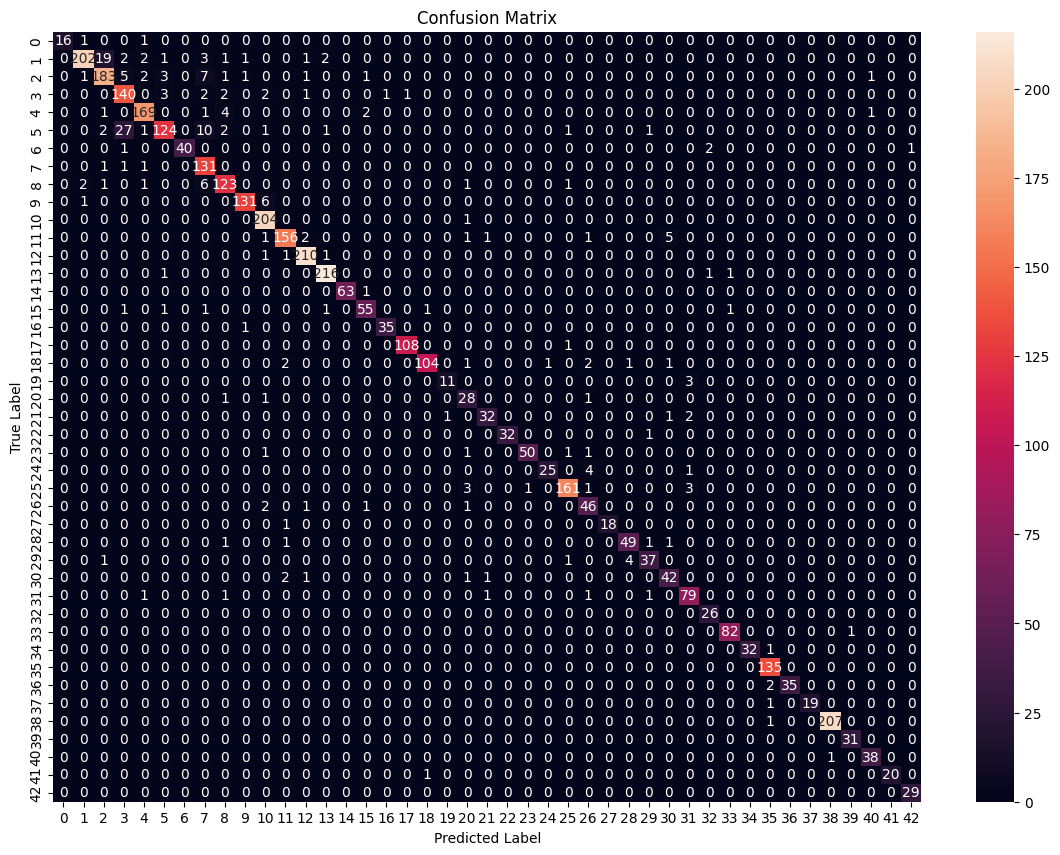

In [8]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Validation Loss:', val_loss[-1])
print('Validation Accuracy:', val_acc[-1])


from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(Test_images)

y_pred = np.argmax(y_pred, axis=1)
Test_labels=np.argmax(Test_labels, axis=1)
cm = confusion_matrix(Test_labels, y_pred)

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_pred2 = model.predict(Valid_images)

y_pred2 = np.argmax(y_pred2, axis=1)
Valid_labels=np.argmax(Valid_labels, axis=1)
cm2 = confusion_matrix(Valid_labels, y_pred2)

plt.figure(figsize=(14,10))
sns.heatmap(cm2, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



# شبکه پیچشی Max pooling

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model
import netron

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(Train_images, Train_labels, epochs=20, validation_data=(Valid_images, Valid_labels))

test_loss, test_acc = model.evaluate(Test_images, Test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


model.save('model.h5')

netron.start('model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

('localhost', 8080)

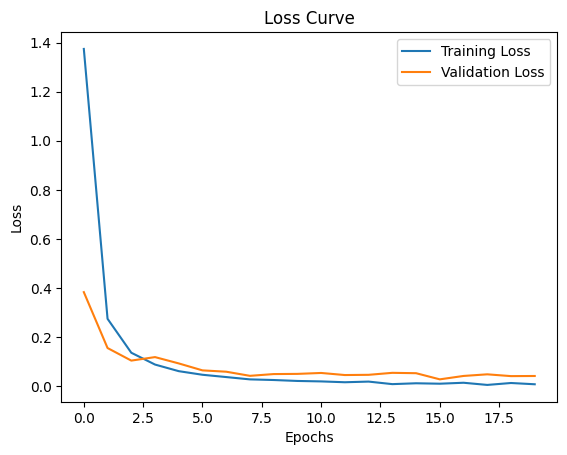

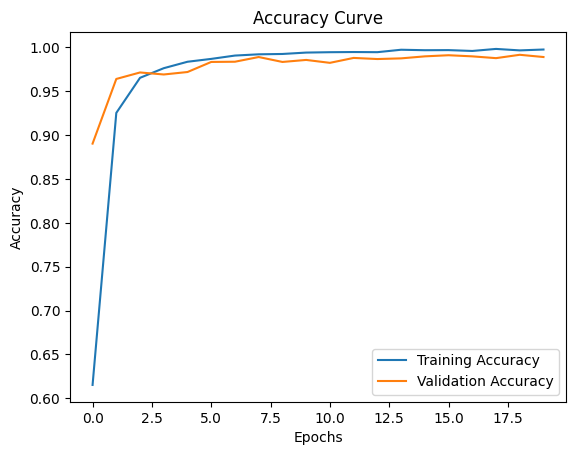

Test Loss: 0.48618727922439575
Test Accuracy: 0.9376880526542664
Validation Loss: 0.04198436439037323
Validation Accuracy: 0.9890334010124207
395/395 [==============================] - 2s 6ms/step


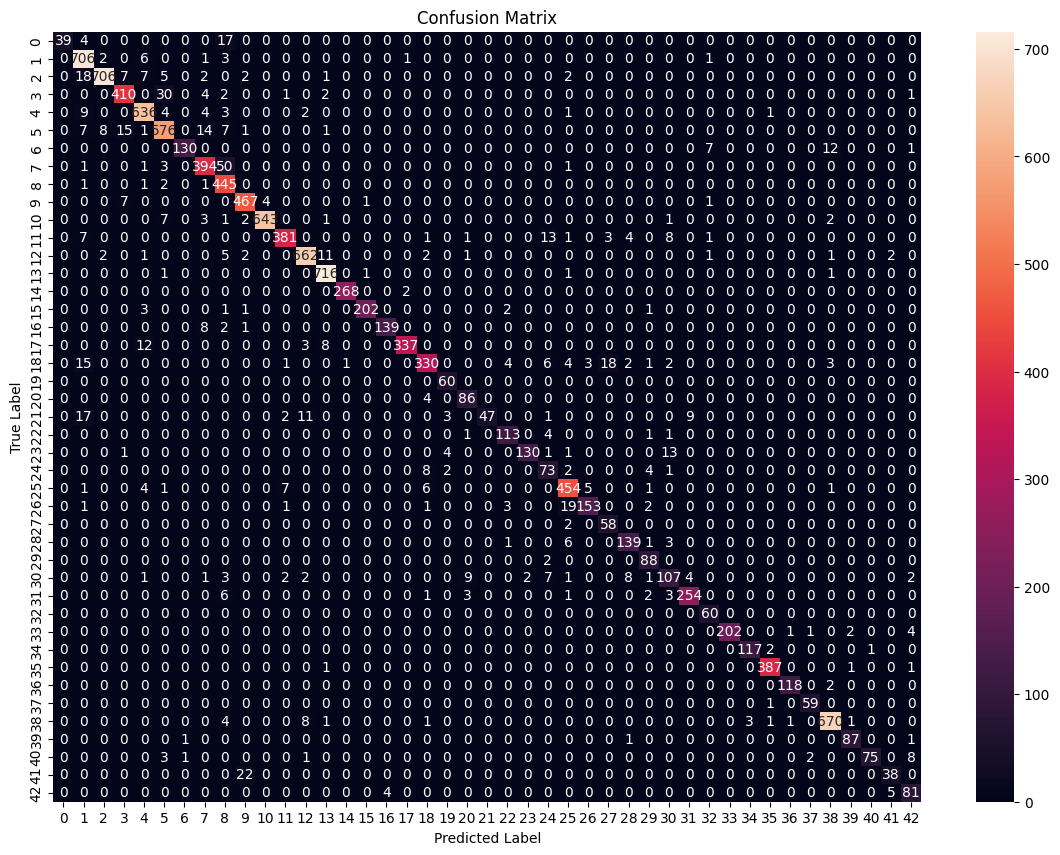

123/123 [==============================] - 1s 5ms/step


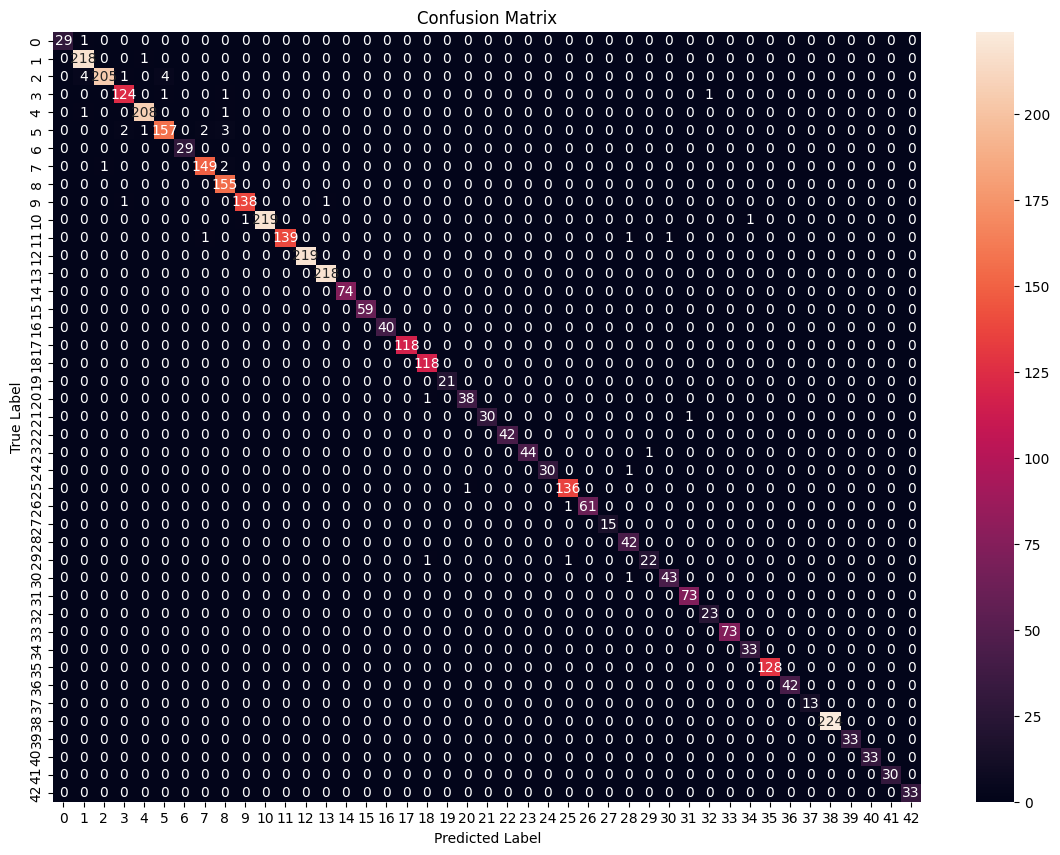

In [8]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Validation Loss:', val_loss[-1])
print('Validation Accuracy:', val_acc[-1])


from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(Test_images)

y_pred = np.argmax(y_pred, axis=1)
Test_labels=np.argmax(Test_labels, axis=1)
cm = confusion_matrix(Test_labels, y_pred)

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_pred2 = model.predict(Valid_images)

y_pred2 = np.argmax(y_pred2, axis=1)
Valid_labels=np.argmax(Valid_labels, axis=1)
cm2 = confusion_matrix(Valid_labels, y_pred2)

plt.figure(figsize=(14,10))
sns.heatmap(cm2, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# شبکه پیچشی Average pooling

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import load_model
import netron

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(Train_images, Train_labels, epochs=20, validation_data=(Valid_images, Valid_labels))

test_loss, test_acc = model.evaluate(Test_images, Test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


model.save('model.h5')

netron.start('model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

('localhost', 8080)

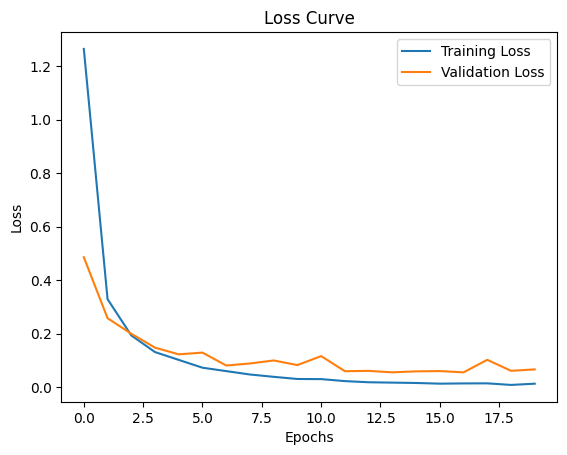

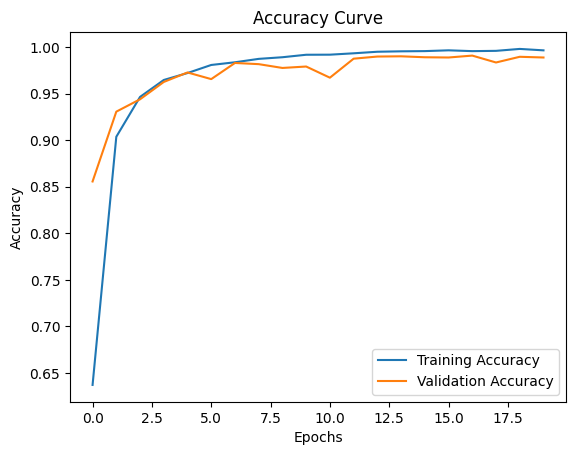

Test Loss: 0.5596073865890503
Test Accuracy: 0.9155977964401245
Validation Loss: 0.06614147871732712
Validation Accuracy: 0.9887783527374268
395/395 [==============================] - 2s 6ms/step


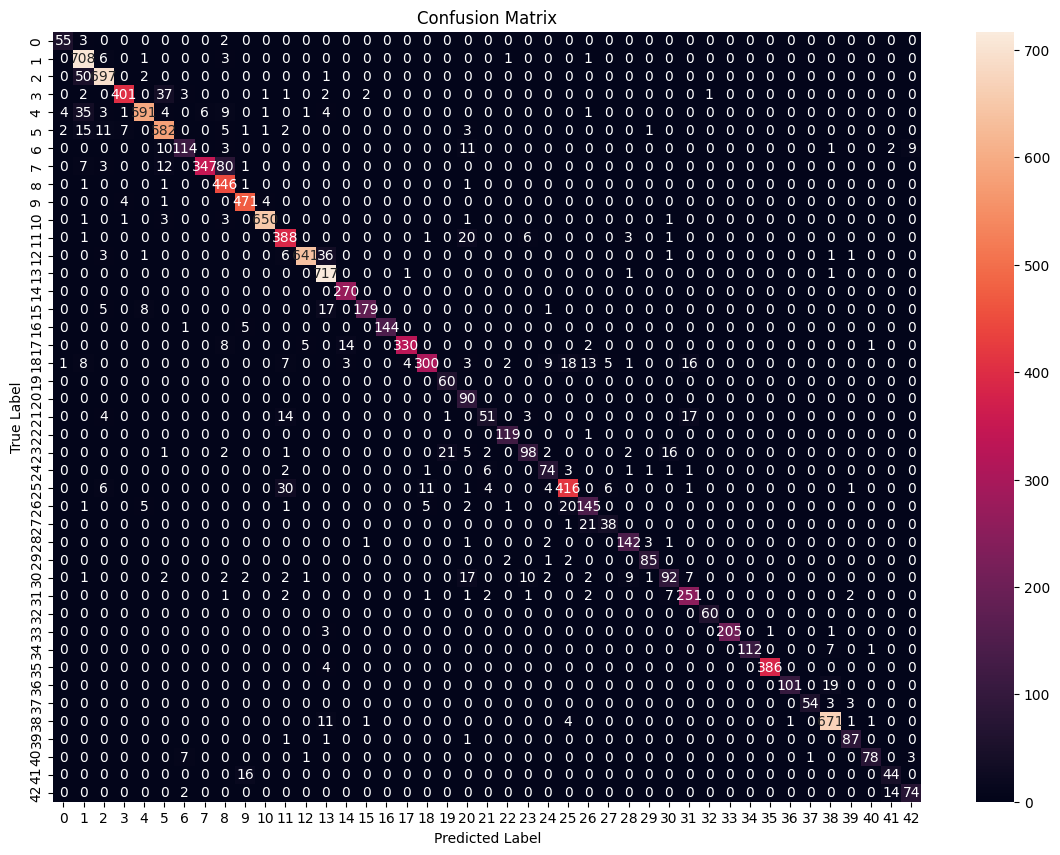

123/123 [==============================] - 1s 5ms/step


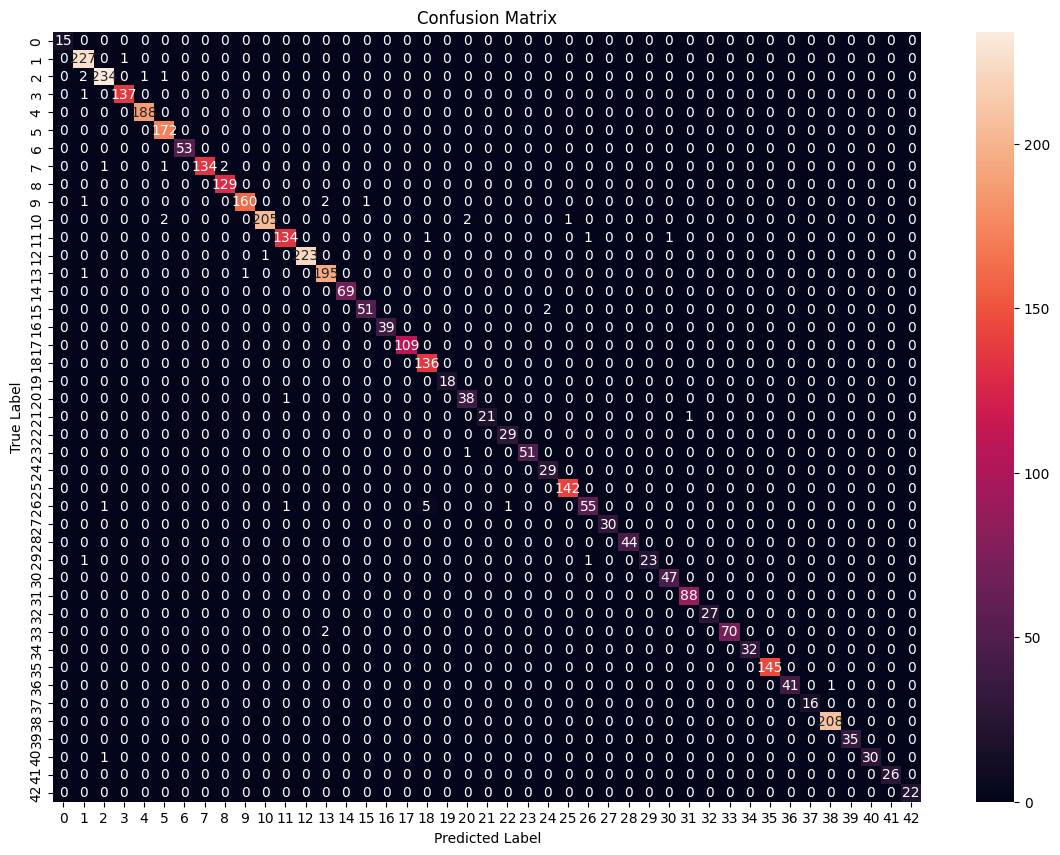

In [8]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Validation Loss:', val_loss[-1])
print('Validation Accuracy:', val_acc[-1])


from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(Test_images)

y_pred = np.argmax(y_pred, axis=1)
Test_labels=np.argmax(Test_labels, axis=1)
cm = confusion_matrix(Test_labels, y_pred)

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_pred2 = model.predict(Valid_images)

y_pred2 = np.argmax(y_pred2, axis=1)
Valid_labels=np.argmax(Valid_labels, axis=1)
cm2 = confusion_matrix(Valid_labels, y_pred2)

plt.figure(figsize=(14,10))
sns.heatmap(cm2, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  dropout شبکه پیچشی با 

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
import netron

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(43, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(Train_images, Train_labels, epochs=20, validation_data=(Valid_images, Valid_labels))

test_loss, test_acc = model.evaluate(Test_images, Test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


model.save('model.h5')

netron.start('model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

('localhost', 8080)

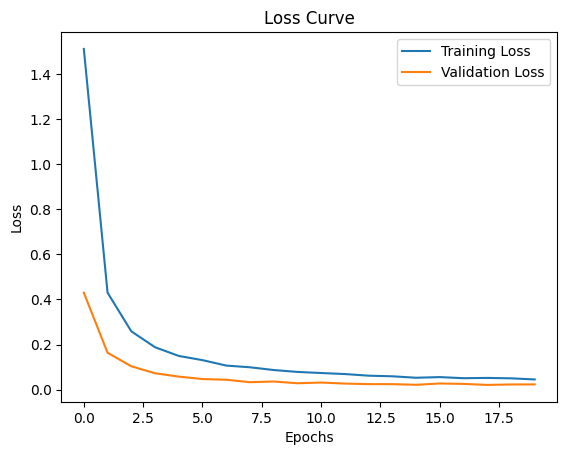

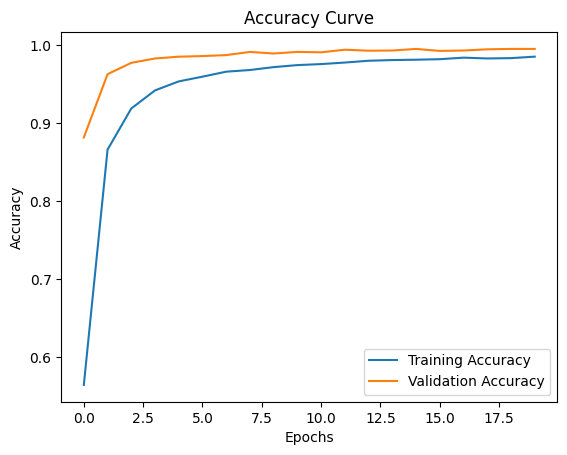

Test Loss: 0.2159057855606079
Test Accuracy: 0.9577988982200623
Validation Loss: 0.02376691810786724
Validation Accuracy: 0.9954093098640442
395/395 [==============================] - 2s 6ms/step


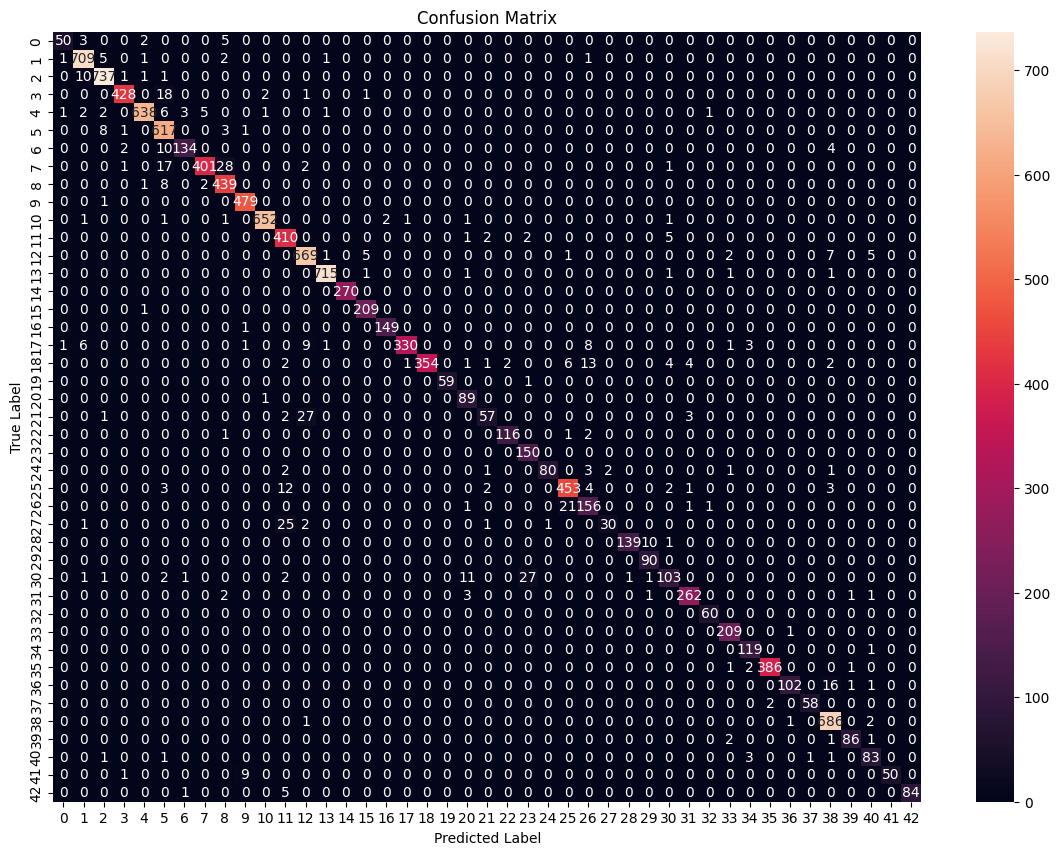

123/123 [==============================] - 1s 8ms/step


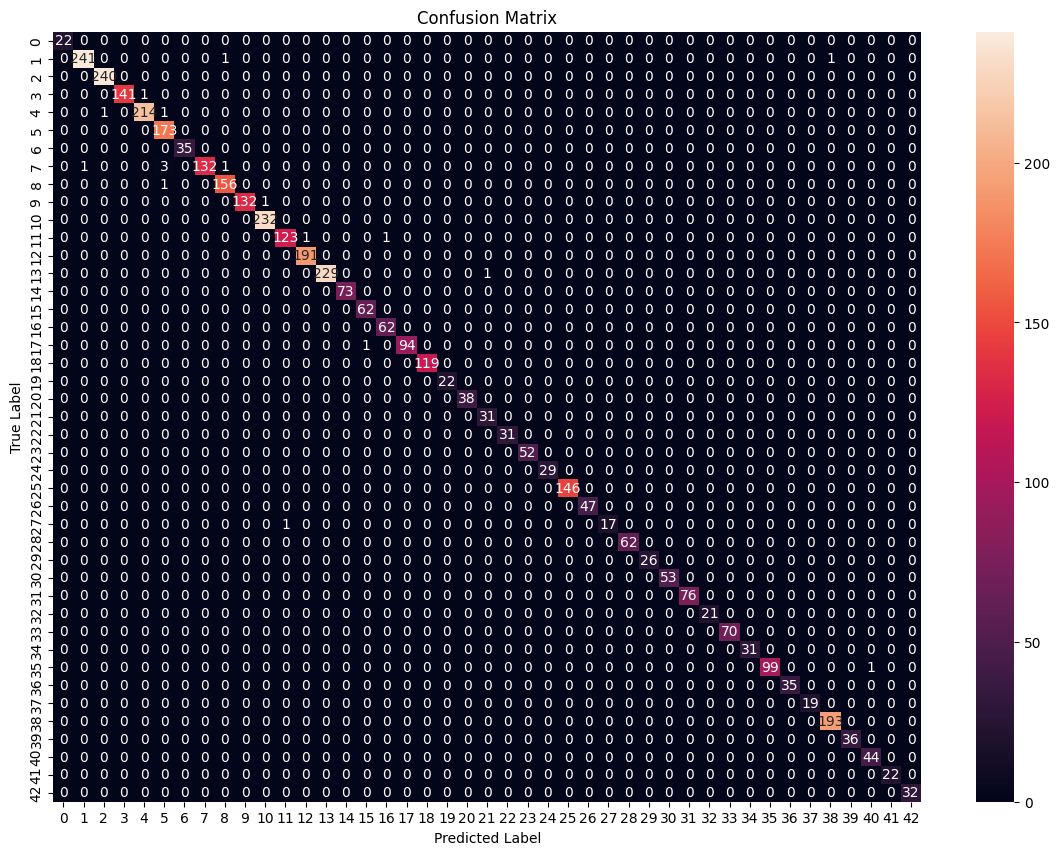

In [8]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Validation Loss:', val_loss[-1])
print('Validation Accuracy:', val_acc[-1])


from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(Test_images)

y_pred = np.argmax(y_pred, axis=1)
Test_labels=np.argmax(Test_labels, axis=1)
cm = confusion_matrix(Test_labels, y_pred)

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_pred2 = model.predict(Valid_images)

y_pred2 = np.argmax(y_pred2, axis=1)
Valid_labels=np.argmax(Valid_labels, axis=1)
cm2 = confusion_matrix(Valid_labels, y_pred2)

plt.figure(figsize=(14,10))
sns.heatmap(cm2, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# شبکه پیچشی SGD

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
import netron

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(43, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(Train_images, Train_labels, epochs=20, validation_data=(Valid_images, Valid_labels))

test_loss, test_acc = model.evaluate(Test_images, Test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


model.save('model.h5')

netron.start('model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

KeyboardInterrupt: 

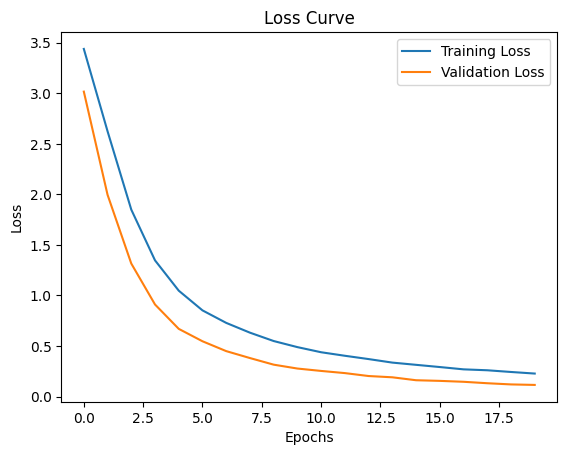

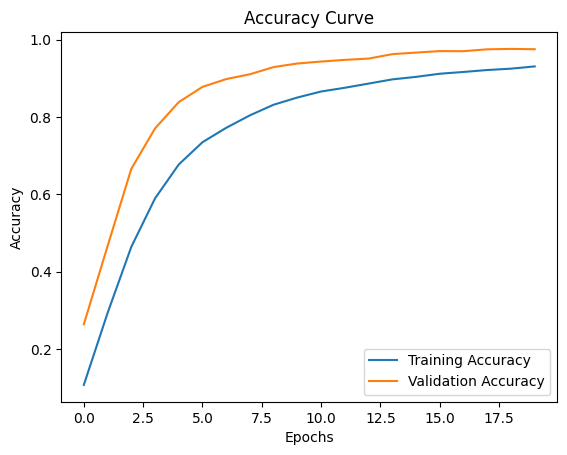

Test Loss: 0.36869513988494873
Test Accuracy: 0.9092636704444885
Validation Loss: 0.11457298696041107
Validation Accuracy: 0.9755164384841919
395/395 [==============================] - 2s 5ms/step


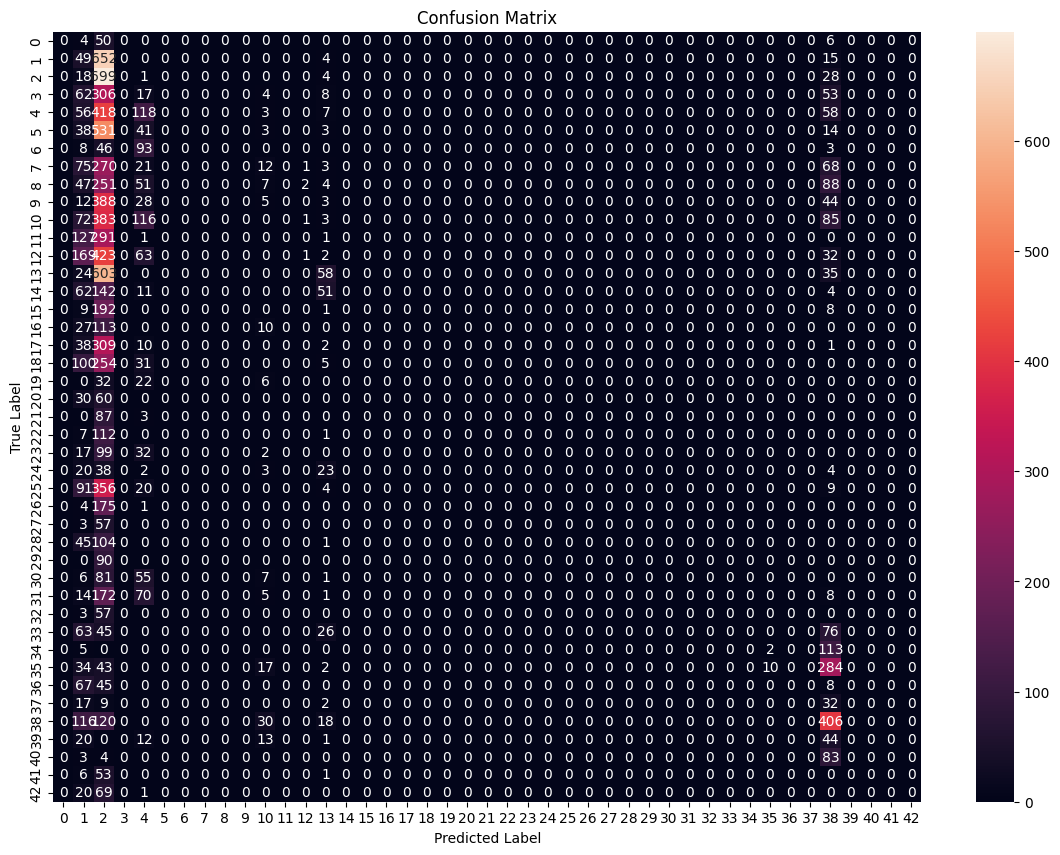

123/123 [==============================] - 1s 5ms/step


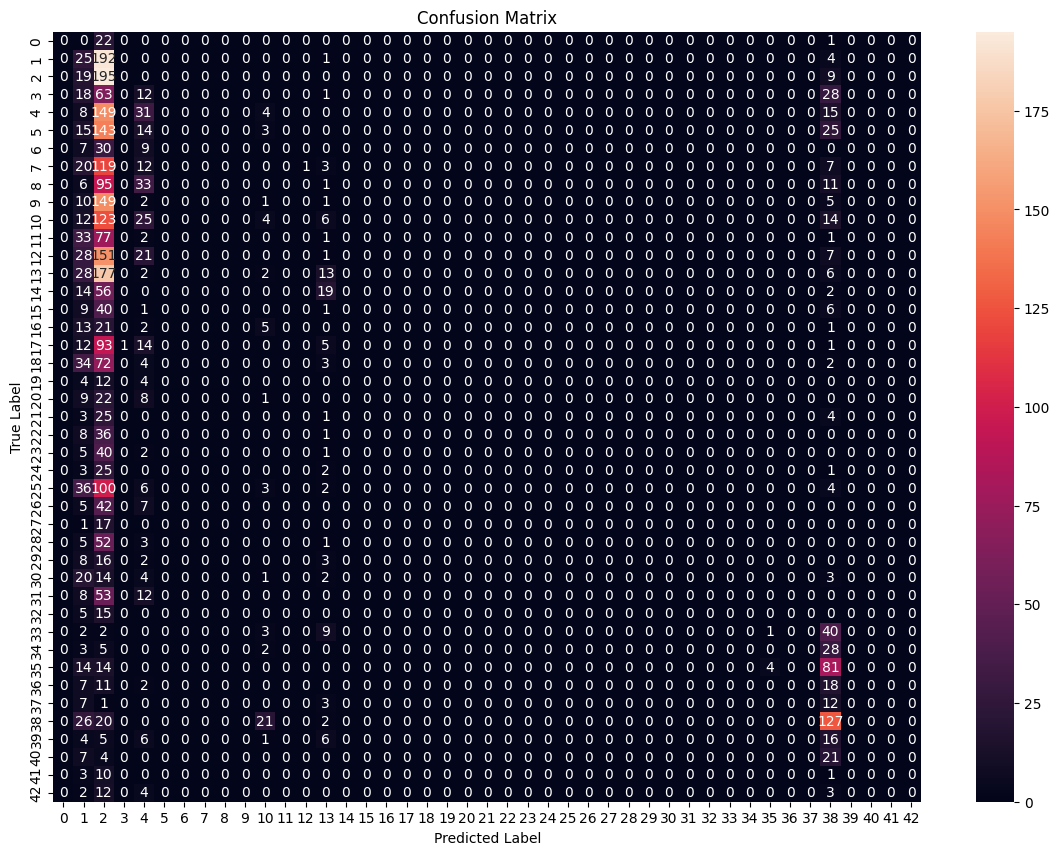

In [9]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Validation Loss:', val_loss[-1])
print('Validation Accuracy:', val_acc[-1])


from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(Test_images)

y_pred = np.argmax(y_pred, axis=1)
Test_labels=np.argmax(Test_labels, axis=1)
cm = confusion_matrix(Test_labels, y_pred)

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_pred2 = model.predict(Valid_images)

y_pred2 = np.argmax(y_pred2, axis=1)
Valid_labels=np.argmax(Valid_labels, axis=1)
cm2 = confusion_matrix(Valid_labels, y_pred2)

plt.figure(figsize=(14,10))
sns.heatmap(cm2, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# شبکه پیچشی با تابع فعال سازی sigmoid

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
import netron

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(30, 30, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(43, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(Train_images, Train_labels, epochs=20, validation_data=(Valid_images, Valid_labels))

test_loss, test_acc = model.evaluate(Test_images, Test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


model.save('model.h5')

netron.start('model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

('localhost', 8080)

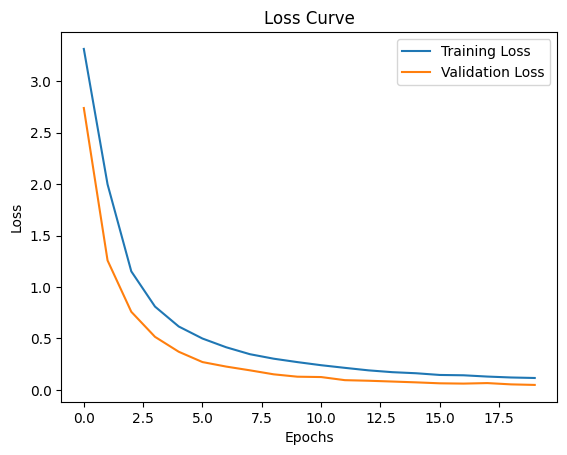

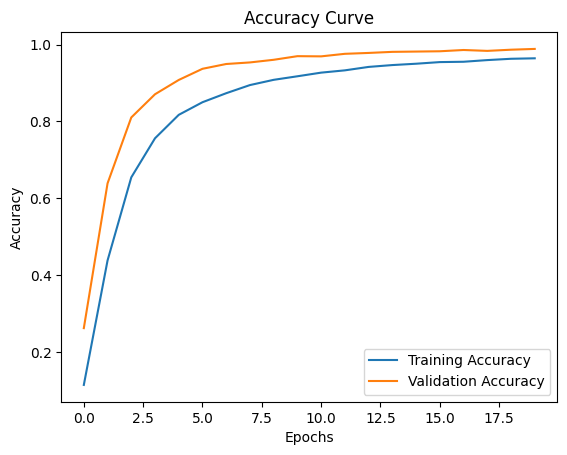

Test Loss: 0.30611008405685425
Test Accuracy: 0.9108471870422363
Validation Loss: 0.048046376556158066
Validation Accuracy: 0.9890334010124207
395/395 [==============================] - 2s 6ms/step


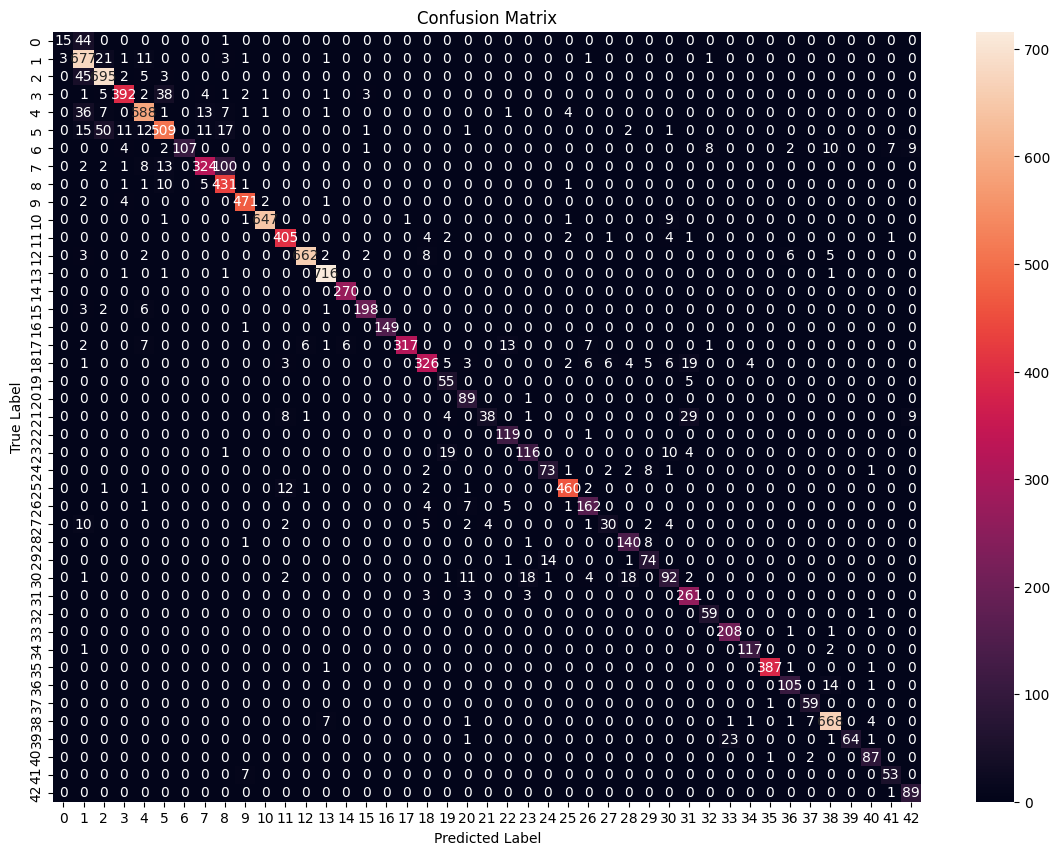

123/123 [==============================] - 1s 6ms/step


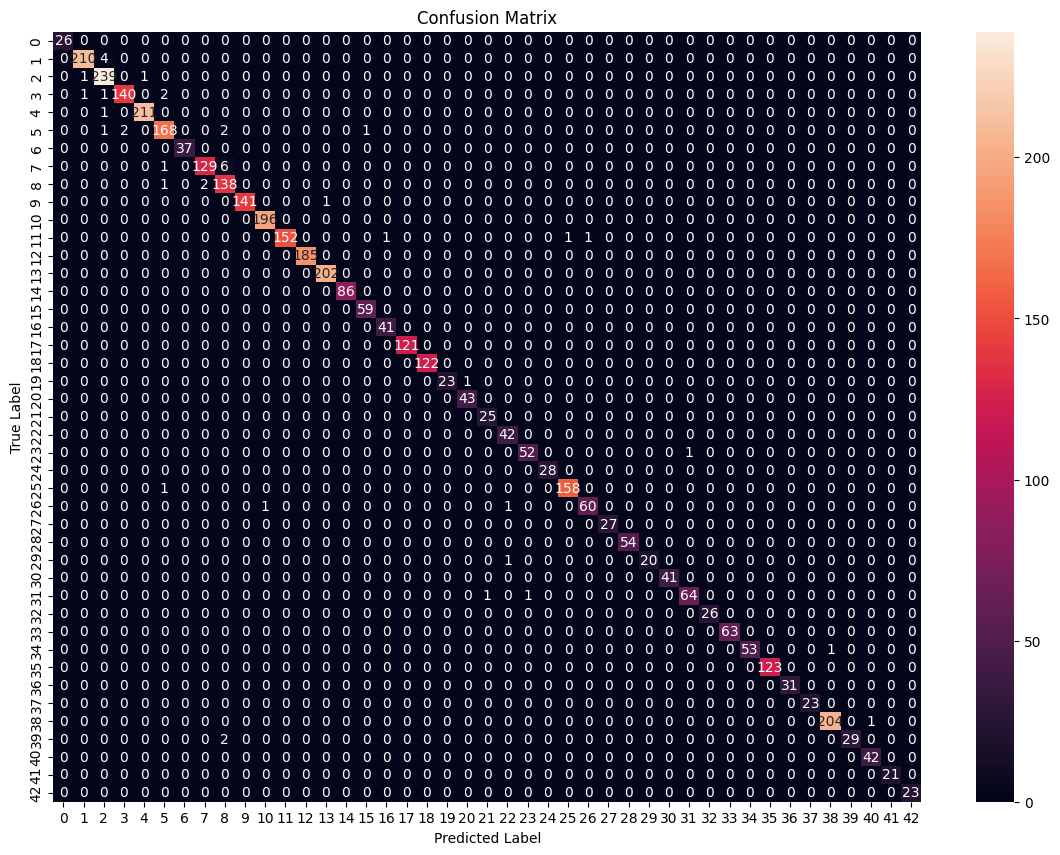

In [8]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Validation Loss:', val_loss[-1])
print('Validation Accuracy:', val_acc[-1])


from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(Test_images)

y_pred = np.argmax(y_pred, axis=1)
Test_labels=np.argmax(Test_labels, axis=1)
cm = confusion_matrix(Test_labels, y_pred)

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_pred2 = model.predict(Valid_images)

y_pred2 = np.argmax(y_pred2, axis=1)
Valid_labels=np.argmax(Valid_labels, axis=1)
cm2 = confusion_matrix(Valid_labels, y_pred2)

plt.figure(figsize=(14,10))
sns.heatmap(cm2, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# شبکه پیچشی با تابع فعال سازی tanh

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
import netron

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='tanh', input_shape=(30, 30, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(43, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(Train_images, Train_labels, epochs=20, validation_data=(Valid_images, Valid_labels))

test_loss, test_acc = model.evaluate(Test_images, Test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


model.save('model.h5')

netron.start('model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

('localhost', 8080)

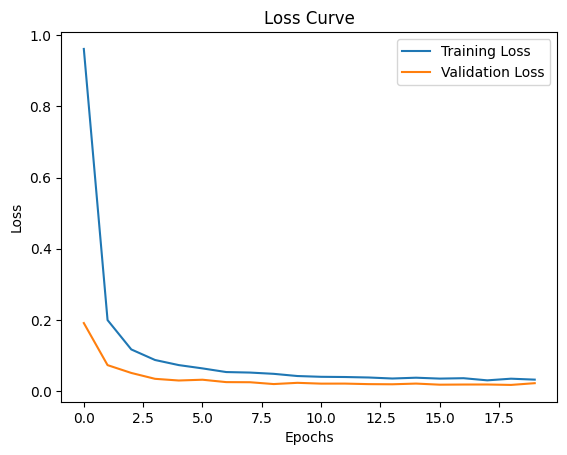

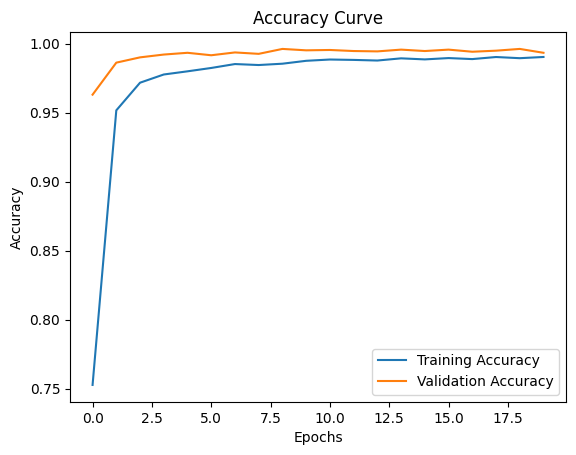

Test Loss: 0.18630479276180267
Test Accuracy: 0.9528899192810059
Validation Loss: 0.02172083966434002
Validation Accuracy: 0.9933690428733826
395/395 [==============================] - 2s 6ms/step


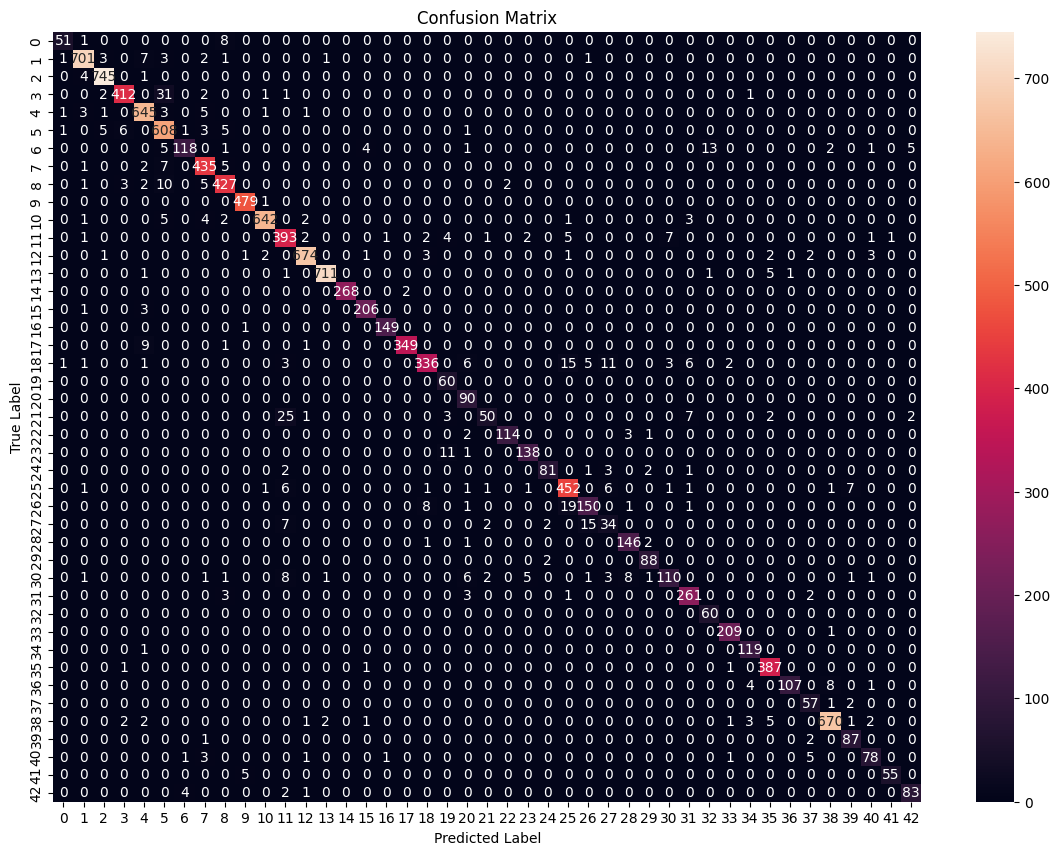

123/123 [==============================] - 1s 6ms/step


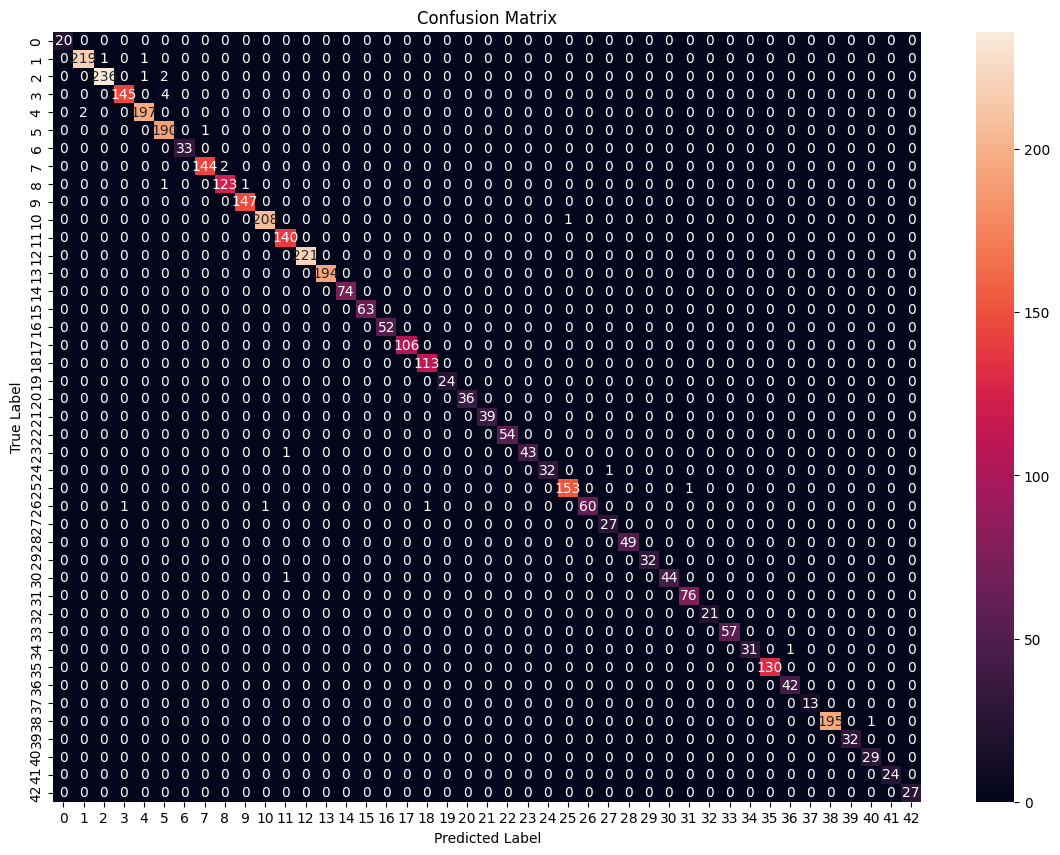

In [8]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Validation Loss:', val_loss[-1])
print('Validation Accuracy:', val_acc[-1])


from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(Test_images)

y_pred = np.argmax(y_pred, axis=1)
Test_labels=np.argmax(Test_labels, axis=1)
cm = confusion_matrix(Test_labels, y_pred)

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_pred2 = model.predict(Valid_images)

y_pred2 = np.argmax(y_pred2, axis=1)
Valid_labels=np.argmax(Valid_labels, axis=1)
cm2 = confusion_matrix(Valid_labels, y_pred2)

plt.figure(figsize=(14,10))
sns.heatmap(cm2, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Data Augmentation شبکه پیچشی با روش

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 6, 6, 64)         

('localhost', 8080)

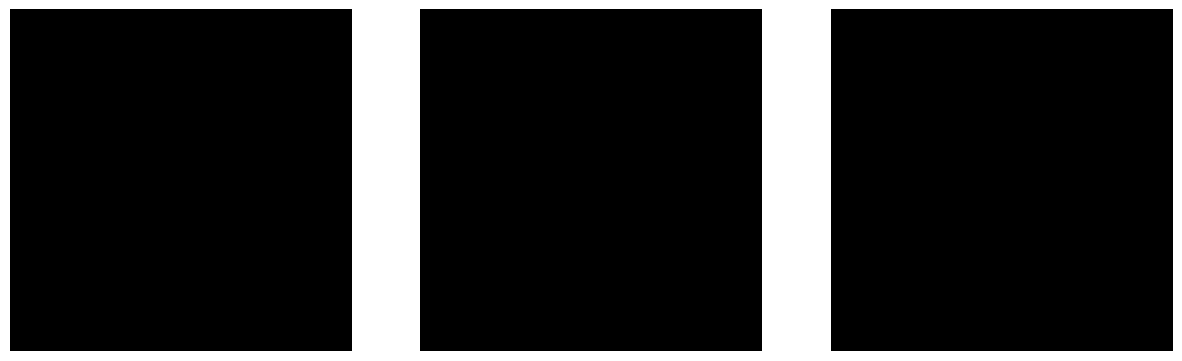

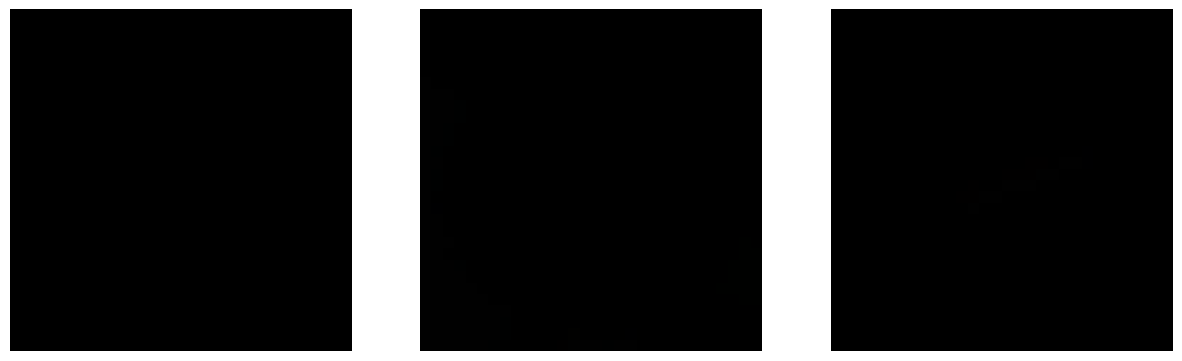

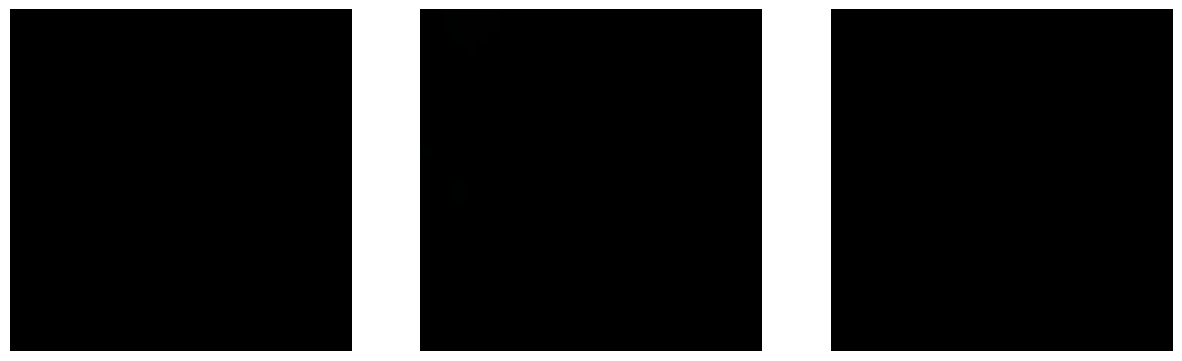

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
import netron
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(43, activation='softmax'))

#rotation
datagen = ImageDataGenerator(rotation_range=30, fill_mode='nearest')

aug_iter = datagen.flow(Train_images, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')
    
#shifting
datagen2 = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

aug_iter = datagen.flow(Train_images, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(image)
    ax[i].axis('off')

#brightness
datagen3 = ImageDataGenerator(brightness_range=[0.4,1.5])

aug_iter = datagen.flow(Train_images, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):
    image = next(aug_iter)[0].astype('uint8') 
    ax[i].imshow(image)
    ax[i].axis('off')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(Train_images, Train_labels, epochs=20, validation_data=(Valid_images, Valid_labels))

test_loss, test_acc = model.evaluate(Test_images, Test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


model.save('model.h5')

netron.start('model.h5')

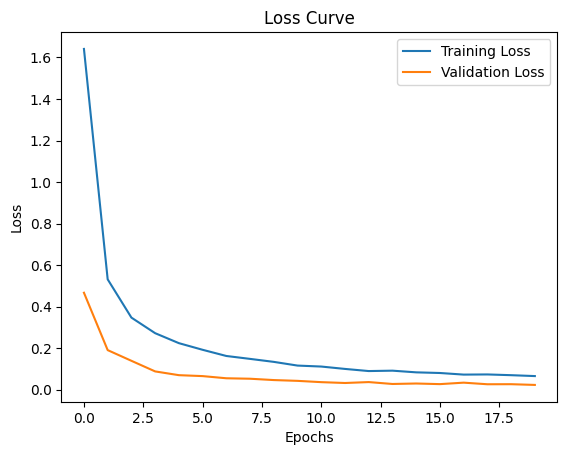

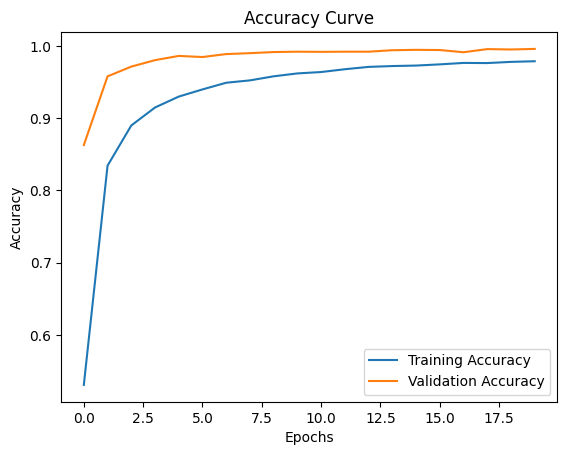

Test Loss: 0.20027558505535126
Test Accuracy: 0.9588282108306885
Validation Loss: 0.022990191355347633
Validation Accuracy: 0.995919406414032
395/395 [==============================] - 2s 5ms/step


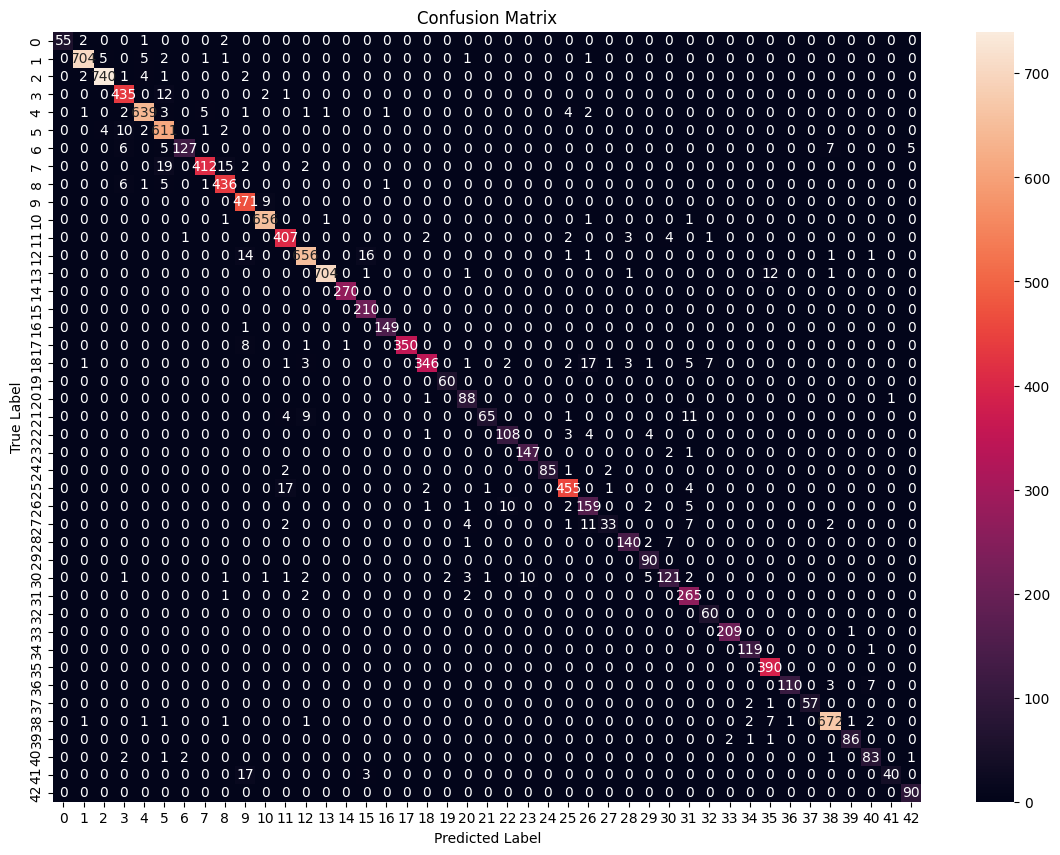

123/123 [==============================] - 1s 5ms/step


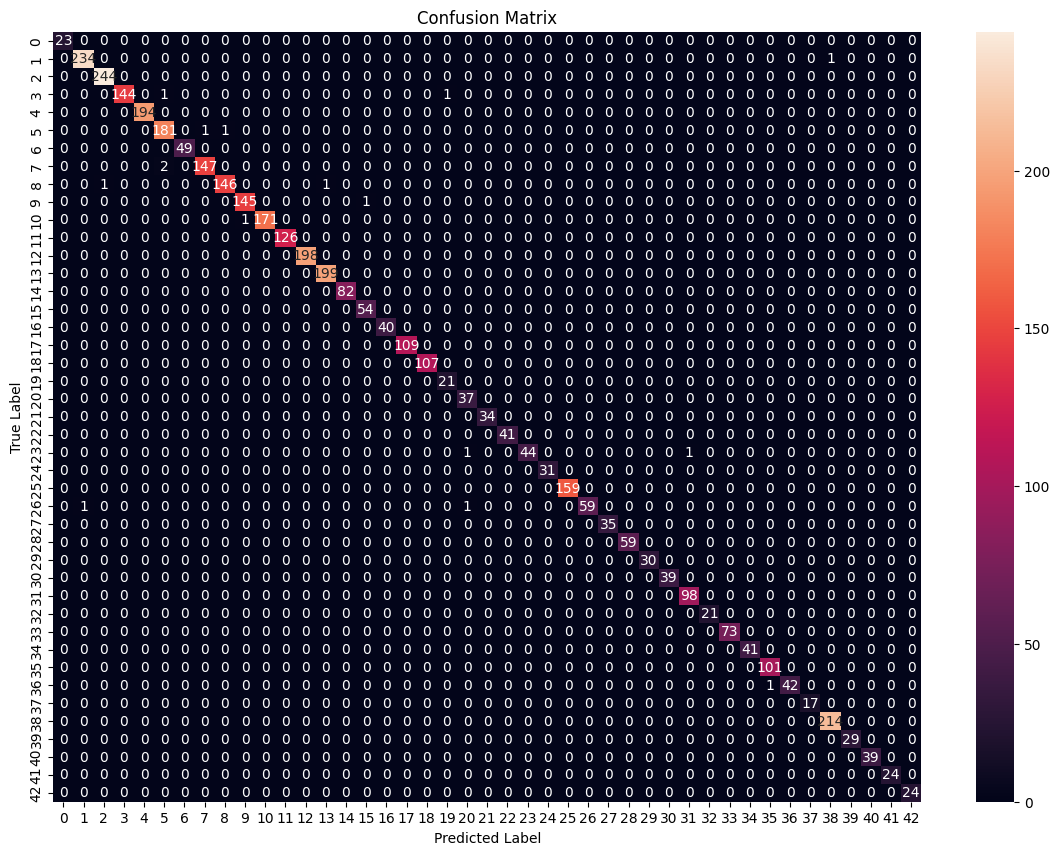

In [11]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Validation Loss:', val_loss[-1])
print('Validation Accuracy:', val_acc[-1])


from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(Test_images)

y_pred = np.argmax(y_pred, axis=1)
Test_labels=np.argmax(Test_labels, axis=1)
cm = confusion_matrix(Test_labels, y_pred)

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


y_pred2 = model.predict(Valid_images)

y_pred2 = np.argmax(y_pred2, axis=1)
Valid_labels=np.argmax(Valid_labels, axis=1)
cm2 = confusion_matrix(Valid_labels, y_pred2)

plt.figure(figsize=(14,10))
sns.heatmap(cm2, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()